In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder

import scipy
from scipy.cluster .hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist

from pylab import rcParams

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sn

from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation

from sklearn.cluster import MiniBatchKMeans

import time
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_column', 111)
pd.set_option('display.max_row', 111)
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/GAN_RECOMEND__Dataupdate6.csv')

df = data.copy()

In [ ]:
df.head(10)

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease,hypertension,weak,dizziness,headache,nausea_and_vomiting,avc_status,prescription
0,0,76.437862,0,1,0,209.869456,57.308305,0,1,0,1,1,0,0,1,anticoagulant
1,0,35.557175,0,1,0,141.787630,57.759636,0,1,0,0,0,0,0,0,none
2,0,74.516756,0,1,0,188.244116,55.066261,0,0,0,1,1,0,0,1,fibrate
3,0,71.899644,0,1,0,204.780538,51.439135,1,0,1,0,0,0,0,0,none
4,0,77.162784,0,1,0,202.699287,47.958142,0,0,0,0,0,0,0,0,none
5,0,74.102954,0,1,0,128.999297,54.085841,1,0,0,0,0,0,0,0,none
6,0,69.356067,0,1,0,119.818393,58.329620,0,0,1,0,0,0,0,0,none
7,0,77.790605,0,1,0,158.189941,49.073388,0,1,0,1,1,0,0,1,anticoagulant
8,0,71.920790,0,1,0,62.537392,57.120743,1,0,0,0,0,0,0,0,none
9,0,71.929446,0,1,0,131.613335,60.894928,2,0,0,0,0,0,0,0,none


In [ ]:
le = LabelEncoder()
label = le.fit_transform(df['prescription'])
df.drop("prescription", axis=1, inplace=True)
df["prescription"] = label

In [ ]:
df.head(10)

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease,hypertension,weak,dizziness,headache,nausea_and_vomiting,avc_status,prescription
0,0,76.437862,0,1,0,209.869456,57.308305,0,1,0,1,1,0,0,1,0
1,0,35.557175,0,1,0,141.787630,57.759636,0,1,0,0,0,0,0,0,3
2,0,74.516756,0,1,0,188.244116,55.066261,0,0,0,1,1,0,0,1,2
3,0,71.899644,0,1,0,204.780538,51.439135,1,0,1,0,0,0,0,0,3
4,0,77.162784,0,1,0,202.699287,47.958142,0,0,0,0,0,0,0,0,3
5,0,74.102954,0,1,0,128.999297,54.085841,1,0,0,0,0,0,0,0,3
6,0,69.356067,0,1,0,119.818393,58.329620,0,0,1,0,0,0,0,0,3
7,0,77.790605,0,1,0,158.189941,49.073388,0,1,0,1,1,0,0,1,0
8,0,71.920790,0,1,0,62.537392,57.120743,1,0,0,0,0,0,0,0,3
9,0,71.929446,0,1,0,131.613335,60.894928,2,0,0,0,0,0,0,0,3


In [ ]:
age = df['age'].values

In [ ]:
max_value = np.max(age)
min_value = np.min(age)
print(max_value, min_value)

82.0 0.0972768421052734


In [ ]:
quantitative_columns = ['age', 'avg_glucose_level', 'bmi']
features = ['age','bmi','heart_disease', 'hypertension','weak', 'dizziness', 'headache', 'nausea_and_vomiting']
target = ['prescription']

X = df[features]
Y = df[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

Text(0.5, 0, 'n_components')

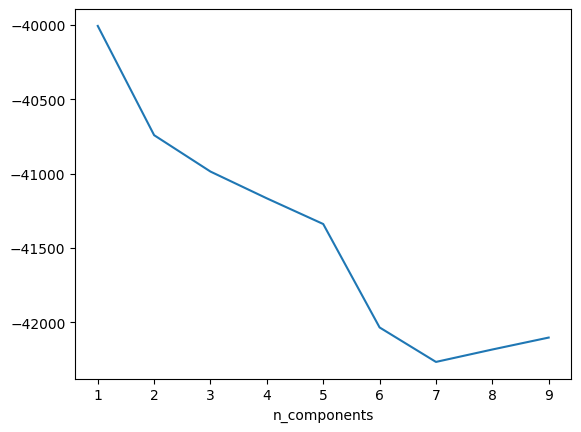

In [ ]:
n_components = np.arange(1,10)
gmm = [GaussianMixture(n, covariance_type = 'tied', random_state = 0).fit(X_train) for n in n_components]

plt.plot(n_components, [m.bic(X_train) for m in gmm], label = 'BIC')
plt.xlabel('n_components')

In [ ]:
def gmm_bic_score(estimator, X_train):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X_train)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X_train)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x790c4723f250>)

In [ ]:
df1 = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df1["mean_test_score"] = -df1["mean_test_score"]
df1 = df1.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
score = df1.sort_values(by="BIC score").head()

In [ ]:
score.head()

,Number of components,Type of covariance,BIC score
17,6,diag,-73746.399548
22,5,full,-67785.817344
23,6,full,-65784.659638
16,5,diag,-64361.670672
21,4,full,-56889.500575


In [ ]:
n_cluster = score.loc[score.index[0],"Number of components"]
type_cov = score.loc[score.index[0],"Type of covariance"]

In [ ]:
silhouetekm = []
silhouetegm = []
for i in range(2, 11):
    try:
        kmeans = KMeans(n_clusters=i)
        kmlabel = kmeans.fit_predict(X_train)
        gmm = GaussianMixture(n_components= i)
        gmmlabel = gmm.fit_predict(X_train)

        #kprototype.fit_predict(dfMatrix, categorical = )
        silhouetekm.append(silhouette_score(X_train, kmlabel))
        silhouetegm.append(silhouette_score(X_train, gmmlabel))
    except:
        break

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

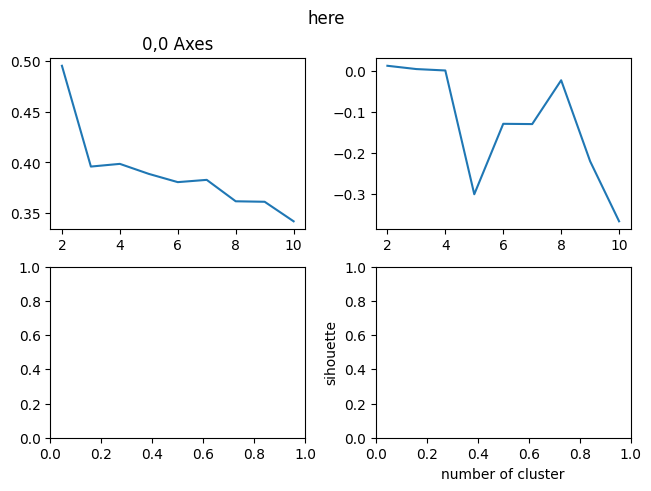

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, constrained_layout = True)
axs[0][0].set_title("0,0 Axes")
axs[0][1].plot(range(2,11), silhouetegm)
axs[0][0].plot(range(2,11), silhouetekm)
fig.suptitle("here")
plt.xlabel('number of cluster')
plt.ylabel('sihouette')
plt.show

In [ ]:
stcluster = time.time()
gmm = GaussianMixture(n_components = 6, covariance_type = 'tied', random_state = 0)
labels = gmm.fit_predict(X_train)
endcluster = time.time()

X_train['cluster'] = labels
print("clustering_time:", endcluster - stcluster)

clustering_time: 0.2593214511871338


In [ ]:
data_cluster0 = X_train[(X_train['cluster'] == 0)]
data_cluster1 = X_train[(X_train['cluster'] == 1)]
data_cluster2 = X_train[(X_train['cluster'] == 2)]
data_cluster3 = X_train[(X_train['cluster'] == 3)]
data_cluster4 = X_train[(X_train['cluster'] == 4)]
data_cluster5 = X_train[(X_train['cluster'] == 5)]

data_cluster0 = data_cluster0[features]
data_cluster1 = data_cluster1[features]
data_cluster2 = data_cluster2[features]
data_cluster3 = data_cluster3[features]
data_cluster4 = data_cluster4[features]
data_cluster5 = data_cluster5[features]

In [ ]:
print(data_cluster0.shape, data_cluster1.shape, data_cluster2.shape, data_cluster3.shape, data_cluster4.shape, data_cluster5.shape)

(1877, 8) (1682, 8) (1280, 8) (636, 8) (580, 8) (1697, 8)


In [ ]:
print("silhouete score: ", silhouette_score(X_train, labels, metric = "sqeuclidean"))

silhouete score:  0.5456289602805351


In [ ]:
start  = time.time()
test_label = gmm.predict(X_test)
end = time.time()
print("time taken: ", end - start)

time taken:  0.00485539436340332


In [ ]:
print("silhouete score: ", silhouette_score(X_test, test_label, metric = "sqeuclidean"))

silhouete score:  0.5446780183305624


In [ ]:
no_of_clusters = []
af_sil_score = []
preferences = range(-1000,-100, 100)


for p in preferences:
  AF = AffinityPropagation(preference = p, max_iter = 200).fit(data_cluster0)
  no_of_clusters.append(len(AF.cluster_centers_))
  if len(AF.cluster_centers_) > 1:
      af_sil_score.append(silhouette_score(data_cluster0, AF.labels_, metric="sqeuclidean"))
  else :
      af_sil_score.append(-1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Af

In [ ]:
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index = ['preference', 'clusters', 'sil_score']).T
af_results.sort_values(by = "sil_score", ascending = False).head()

,preference,clusters,sil_score
8,-200.0,32.0,0.467505
7,-300.0,145.0,0.295216
6,-400.0,230.0,0.234495
3,-700.0,243.0,0.185811
5,-500.0,317.0,0.162088


In [ ]:
AF = AffinityPropagation(preference = -300, damping = 0.9, max_iter = 200)
sub_class = AF.fit_predict(data_cluster0)
silhouette_score(data_cluster0, AF.labels_, metric = "sqeuclidean")

0.4856942166778139

In [ ]:
data_cluster0['sub_class'] = sub_class

In [ ]:
no_of_clusters = []
af_sil_score = []
preferences = range(-1000,-100, 100)


for p in preferences:
  AF1 = AffinityPropagation(preference = p, max_iter = 200).fit(data_cluster1)
  no_of_clusters.append(len(AF1.cluster_centers_))
  if len(AF1.cluster_centers_) > 1:
      af_sil_score.append(silhouette_score(data_cluster1, AF1.labels_))
  else :
      af_sil_score.append(-1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Af

In [ ]:
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index = ['preference', 'clusters', 'sil_score']).T
af_results.sort_values(by = "sil_score", ascending = False).head()

,preference,clusters,sil_score
8,-200.0,31.0,0.299651
7,-300.0,81.0,0.276039
0,-1000.0,4.0,0.239698
3,-700.0,67.0,0.188087
5,-500.0,95.0,0.180649


In [ ]:
start = time.time()
AF1 = AffinityPropagation(preference = -200, damping = 0.8, max_iter = 200)
sub_class = AF1.fit_predict(data_cluster1)
silhouette_score(data_cluster1, AF1.labels_, metric = "sqeuclidean")
end = time.time()

In [ ]:
print(end-start)

5.9991466999053955


In [ ]:
data_cluster1['sub_class'] = sub_class

In [ ]:
no_of_clusters = []
af_sil_score = []
preferences = range(-1000,-100, 100)


for p in preferences:
  AF2 = AffinityPropagation(preference = p, max_iter = 200).fit(data_cluster2)
  no_of_clusters.append(len(AF.cluster_centers_))
  if len(AF2.cluster_centers_) > 1:
      af_sil_score.append(silhouette_score(data_cluster2, AF2.labels_))
  else :
      af_sil_score.append(-1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Af

In [ ]:
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index = ['preference', 'clusters', 'sil_score']).T
af_results.sort_values(by = "sil_score", ascending = False).head()

,preference,clusters,sil_score
8,-200.0,27.0,0.329327
6,-400.0,27.0,0.316549
7,-300.0,27.0,0.226041
4,-600.0,27.0,0.165387
3,-700.0,27.0,0.104935


In [ ]:
start = time.time()
AF2 = AffinityPropagation(preference = -400, damping = 0.6, max_iter = 200)
sub_class = AF2.fit_predict(data_cluster2)
silhouette_score(data_cluster2, AF2.labels_, metric = "sqeuclidean")
end = time.time()

In [ ]:
print(end-start)

4.114814281463623


In [ ]:
data_cluster2['sub_class'] = sub_class

In [ ]:
no_of_clusters = []
af_sil_score = []
preferences = range(-1000,-100, 100)


for p in preferences:
  AF3 = AffinityPropagation(preference = p, max_iter = 200).fit(data_cluster3)
  no_of_clusters.append(len(AF3.cluster_centers_))
  if len(AF3.cluster_centers_) > 1:
      af_sil_score.append(silhouette_score(data_cluster3, AF3.labels_))
  else :
      af_sil_score.append(-1)


af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index = ['preference', 'clusters', 'sil_score']).T
af_results.sort_values(by = "sil_score", ascending = False).head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


,preference,clusters,sil_score
6,-400.0,16.0,0.338279
4,-600.0,14.0,0.334231
7,-300.0,17.0,0.330274
1,-900.0,12.0,0.330180
2,-800.0,12.0,0.325208


In [ ]:
start = time.time()
AF3 = AffinityPropagation(preference = -400, damping = 0.6, max_iter = 200)
sub_class = AF3.fit_predict(data_cluster3)
silhouette_score(data_cluster3, AF3.labels_, metric = "sqeuclidean")
end = time.time()

In [ ]:
print(end-start)

0.4472160339355469


In [ ]:
data_cluster3['sub_class'] = sub_class

In [ ]:
no_of_clusters = []
af_sil_score = []
preferences = range(-1000,-100, 100)


for p in preferences:
  AF4 = AffinityPropagation(preference = p, max_iter = 200).fit(data_cluster4)
  no_of_clusters.append(len(AF4.cluster_centers_))
  if len(AF.cluster_centers_) > 1:
      af_sil_score.append(silhouette_score(data_cluster4, AF4.labels_))
  else :
      af_sil_score.append(-1)


af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index = ['preference', 'clusters', 'sil_score']).T
af_results.sort_values(by = "sil_score", ascending = False).head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


,preference,clusters,sil_score
2,-800.0,11.0,0.327454
4,-600.0,16.0,0.325902
7,-300.0,18.0,0.325613
5,-500.0,15.0,0.322765
1,-900.0,11.0,0.322294


In [ ]:
start = time.time()
AF4 = AffinityPropagation(preference = -800, damping = 0.6, max_iter = 200)
sub_class = AF4.fit_predict(data_cluster4)
silhouette_score(data_cluster4, AF4.labels_, metric = "sqeuclidean")
end = time.time()

In [ ]:
print(end-start)

0.36747145652770996


In [ ]:
data_cluster4['sub_class'] = sub_class

In [ ]:
no_of_clusters = []
af_sil_score = []
preferences = range(-1000,-100, 100)


for p in preferences:
  AF5 = AffinityPropagation(preference = p, max_iter = 200).fit(data_cluster5)
  no_of_clusters.append(len(AF5.cluster_centers_))
  if len(AF5.cluster_centers_) > 1:
      af_sil_score.append(silhouette_score(data_cluster5, AF5.labels_))
  else :
      af_sil_score.append(-1)


af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index = ['preference', 'clusters', 'sil_score']).T
af_results.sort_values(by = "sil_score", ascending = False).head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Af

,preference,clusters,sil_score
7,-300.0,25.0,0.296283
8,-200.0,34.0,0.274570
5,-500.0,122.0,0.179344
6,-400.0,244.0,0.167346
3,-700.0,179.0,0.165981


In [ ]:
start = time.time()
AF5 = AffinityPropagation(preference = -300, damping = 0.6, max_iter = 200)
sub_class = AF5.fit_predict(data_cluster5)
silhouette_score(data_cluster5, AF5.labels_, metric = "sqeuclidean")
end = time.time()

In [ ]:
print(end-start)

5.223538875579834


In [ ]:
data_cluster5['sub_class'] = sub_class

In [ ]:
query_index = np.random.choice(X_test.shape[0])
print(query_index)
Qp = X_test.iloc[query_index,:].values.reshape(1, -1)

1131


In [ ]:
Qp

array([[28.74642441, 40.44786172,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [ ]:
start = time.time()
def CRGANNC(Qp):
  classe  = int(gmm.predict(Qp))


  if classe == 0:
    sub_class = int(AF.predict(Qp))
    P_neighours = data_cluster0[data_cluster0['sub_class'] == sub_class]
    P_neighours = P_neighours[features]

    from scipy.sparse import csr_matrix

    P_neighours_matrix = csr_matrix(P_neighours.values)

    from sklearn.neighbors import NearestNeighbors
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    model_knn.fit(P_neighours_matrix)

    distances, indices = model_knn.kneighbors(Qp, n_neighbors = 9)

    L_index = []
    L_distance = []

    print('Recommendations for {0}:\n'.format(X.index[query_index]))
    for i in range(0, len(distances.flatten())):
      L_index.append(int(P_neighours.index[indices.flatten()[i]]))
      L_distance.append(float(distances.flatten()[i]))

    none_w = 0
    anticoagulant_w = 0
    antihypertenseur_w = 0
    fibrate_w = 0

    for i in range(len(df)):
      for j in range(len(L_index)):
        if L_index[j] == int(df.index[i]):
          if df.loc[i,"prescription"] == 3:
            none_w = none_w + L_distance[j]
          elif df.loc[i,"prescription"] == 0:
            anticoagulant_w = anticoagulant_w + L_distance[j]
          elif df.loc[i,"prescription"] == 1:
            antihypertenseur_w = antihypertenseur_w + L_distance[j]
          else:
            fibrate_w = fibrate_w + L_distance[j]

    if none_w != 0 and anticoagulant_w == 0 and  antihypertenseur_w == 0 and fibrate_w == 0:
      drug = 3
      print("SP-none : {}".format(none_w))
    elif anticoagulant_w != 0 or  antihypertenseur_w != 0 or fibrate_w != 0:
      max_dist = max(L_distance)
      for i in range(len(L_index)):
        if max_dist == L_distance[i]:
          max_ind = L_index[i]
        else:
          continue
      for i in range(len(df)):
        if max_ind == int(df.index[i]):
          if df.loc[i,"prescription"] == 0:
            drug = 0
            print("SP-anticoagulant : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 1:
            drug = 1
            print("SP-antihypertenseur : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 2:
            drug = 2
            print("SP-fibrate : {}".format(max_dist))
            break
          else:
            if anticoagulant_w != 0:
              drug = 0
              print("RP-anticoagulant : {}".format(anticoagulant_w))
            if antihypertenseur_w != 0:
              drug = 1
              print("RP-antihypertenseur : {}".format(antihypertenseur_w))
            if fibrate_w != 0:
              drug = 2
              print("RP-fibrate : {}".format(fibrate_w))


  elif classe == 1:
    sub_class = int(AF1.predict(Qp))
    P_neighours = data_cluster1[data_cluster1['sub_class'] == sub_class]
    P_neighours = P_neighours[features]

    from scipy.sparse import csr_matrix

    P_neighours_matrix = csr_matrix(P_neighours.values)

    from sklearn.neighbors import NearestNeighbors
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    model_knn.fit(P_neighours_matrix)

    distances, indices = model_knn.kneighbors(Qp, n_neighbors = 9)

    L_index = []
    L_distance = []

    print('Recommendations for {0}:\n'.format(X.index[query_index]))
    for i in range(0, len(distances.flatten())):
      L_index.append(int(P_neighours.index[indices.flatten()[i]]))
      L_distance.append(float(distances.flatten()[i]))

    none_w = 0
    anticoagulant_w = 0
    antihypertenseur_w = 0
    fibrate_w = 0

    for i in range(len(df)):
      for j in range(len(L_index)):
        if L_index[j] == int(df.index[i]):
          if df.loc[i,"prescription"] == 3:
            none_w = none_w + L_distance[j]
          elif df.loc[i,"prescription"] == 0:
            anticoagulant_w = anticoagulant_w + L_distance[j]
          elif df.loc[i,"prescription"] == 1:
            antihypertenseur_w = antihypertenseur_w + L_distance[j]
          else:
            fibrate_w = fibrate_w + L_distance[j]

    if none_w != 0 and anticoagulant_w == 0 and  antihypertenseur_w == 0 and fibrate_w == 0:
      drug = 3
      print("SP-none : {}".format(none_w))
    elif anticoagulant_w != 0 or  antihypertenseur_w != 0 or fibrate_w != 0:
      max_dist = max(L_distance)
      for i in range(len(L_index)):
        if max_dist == L_distance[i]:
          max_ind = L_index[i]
        else:
          continue
      for i in range(len(df)):
        if max_ind == int(df.index[i]):
          if df.loc[i,"prescription"] == 0:
            drug = 0
            print("SP-anticoagulant : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 1:
            drug = 1
            print("SP-antihypertenseur : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 2:
            drug = 2
            print("SP-fibrate : {}".format(max_dist))
            break
          else:
            if anticoagulant_w != 0:
              drug = 0
              print("RP-anticoagulant : {}".format(anticoagulant_w))
            if antihypertenseur_w != 0:
              drug = 1
              print("RP-antihypertenseur : {}".format(antihypertenseur_w))
            if fibrate_w != 0:
              drug = 2
              print("RP-fibrate : {}".format(fibrate_w))


  elif classe == 2:
    sub_class = int(AF2.predict(Qp))
    P_neighours = data_cluster2[data_cluster2['sub_class'] == sub_class]
    P_neighours = P_neighours[features]

    from scipy.sparse import csr_matrix

    P_neighours_matrix = csr_matrix(P_neighours.values)

    from sklearn.neighbors import NearestNeighbors
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    model_knn.fit(P_neighours_matrix)

    distances, indices = model_knn.kneighbors(Qp, n_neighbors = 9)

    L_index = []
    L_distance = []

    print('Recommendations for {0}:\n'.format(X.index[query_index]))
    for i in range(0, len(distances.flatten())):
      L_index.append(int(P_neighours.index[indices.flatten()[i]]))
      L_distance.append(float(distances.flatten()[i]))

    none_w = 0
    anticoagulant_w = 0
    antihypertenseur_w = 0
    fibrate_w = 0

    for i in range(len(df)):
      for j in range(len(L_index)):
        if L_index[j] == int(df.index[i]):
          if df.loc[i,"prescription"] == 3:
            none_w = none_w + L_distance[j]
          elif df.loc[i,"prescription"] == 0:
            anticoagulant_w = anticoagulant_w + L_distance[j]
          elif df.loc[i,"prescription"] == 1:
            antihypertenseur_w = antihypertenseur_w + L_distance[j]
          else:
            fibrate_w = fibrate_w + L_distance[j]

    if none_w != 0 and anticoagulant_w == 0 and  antihypertenseur_w == 0 and fibrate_w == 0:
      drug = 3
      print("SP-none : {}".format(none_w))
    elif anticoagulant_w != 0 or  antihypertenseur_w != 0 or fibrate_w != 0:
      max_dist = max(L_distance)
      for i in range(len(L_index)):
        if max_dist == L_distance[i]:
          max_ind = L_index[i]
        else:
          continue
      for i in range(len(df)):
        if max_ind == int(df.index[i]):
          if df.loc[i,"prescription"] == 0:
            drug = 0
            print("SP-anticoagulant : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 1:
            drug = 1
            print("SP-antihypertenseur : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 2:
            drug = 2
            print("SP-fibrate : {}".format(max_dist))
            break
          else:
            if anticoagulant_w != 0:
              drug = 0
              print("RP-anticoagulant : {}".format(anticoagulant_w))
            if antihypertenseur_w != 0:
              drug = 1
              print("RP-antihypertenseur : {}".format(antihypertenseur_w))
            if fibrate_w != 0:
              drug = 2
              print("RP-fibrate : {}".format(fibrate_w))



  elif classe == 3:
    sub_class = int(AF3.predict(Qp))
    P_neighours = data_cluster3[data_cluster3['sub_class'] == sub_class]
    P_neighours = P_neighours[features]

    from scipy.sparse import csr_matrix

    P_neighours_matrix = csr_matrix(P_neighours.values)

    from sklearn.neighbors import NearestNeighbors
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    model_knn.fit(P_neighours_matrix)

    distances, indices = model_knn.kneighbors(Qp, n_neighbors = 9)

    L_index = []
    L_distance = []

    print('Recommendations for {0}:\n'.format(X.index[query_index]))
    for i in range(0, len(distances.flatten())):
      L_index.append(int(P_neighours.index[indices.flatten()[i]]))
      L_distance.append(float(distances.flatten()[i]))

    none_w = 0
    anticoagulant_w = 0
    antihypertenseur_w = 0
    fibrate_w = 0

    for i in range(len(df)):
      for j in range(len(L_index)):
        if L_index[j] == int(df.index[i]):
          if df.loc[i,"prescription"] == 3:
            none_w = none_w + L_distance[j]
          elif df.loc[i,"prescription"] == 0:
            anticoagulant_w = anticoagulant_w + L_distance[j]
          elif df.loc[i,"prescription"] == 1:
            antihypertenseur_w = antihypertenseur_w + L_distance[j]
          else:
            fibrate_w = fibrate_w + L_distance[j]

    if none_w != 0 and anticoagulant_w == 0 and  antihypertenseur_w == 0 and fibrate_w == 0:
      drug = 3
      print("SP-none : {}".format(none_w))
    elif anticoagulant_w != 0 or  antihypertenseur_w != 0 or fibrate_w != 0:
      max_dist = max(L_distance)
      for i in range(len(L_index)):
        if max_dist == L_distance[i]:
          max_ind = L_index[i]
        else:
          continue
      for i in range(len(df)):
        if max_ind == int(df.index[i]):
          if df.loc[i,"prescription"] == 0:
            drug = 0
            print("SP-anticoagulant : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 1:
            drug = 1
            print("SP-antihypertenseur : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 2:
            drug = 2
            print("SP-fibrate : {}".format(max_dist))
            break
          else:
            if anticoagulant_w != 0:
              drug = 0
              print("RP-anticoagulant : {}".format(anticoagulant_w))
            if antihypertenseur_w != 0:
              drug = 1
              print("RP-antihypertenseur : {}".format(antihypertenseur_w))
            if fibrate_w != 0:
              drug = 2
              print("RP-fibrate : {}".format(fibrate_w))

  elif classe == 4:
    sub_class = int(AF4.predict(Qp))
    P_neighours = data_cluster4[data_cluster4['sub_class'] == sub_class]
    P_neighours = P_neighours[features]

    from scipy.sparse import csr_matrix

    P_neighours_matrix = csr_matrix(P_neighours.values)

    from sklearn.neighbors import NearestNeighbors
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    model_knn.fit(P_neighours_matrix)

    distances, indices = model_knn.kneighbors(Qp, n_neighbors = 9)

    L_index = []
    L_distance = []

    print('Recommendations for {0}:\n'.format(X.index[query_index]))
    for i in range(0, len(distances.flatten())):
      L_index.append(int(P_neighours.index[indices.flatten()[i]]))
      L_distance.append(float(distances.flatten()[i]))

    none_w = 0
    anticoagulant_w = 0
    antihypertenseur_w = 0
    fibrate_w = 0

    for i in range(len(df)):
      for j in range(len(L_index)):
        if L_index[j] == int(df.index[i]):
          if df.loc[i,"prescription"] == 3:
            none_w = none_w + L_distance[j]
          elif df.loc[i,"prescription"] == 0:
            anticoagulant_w = anticoagulant_w + L_distance[j]
          elif df.loc[i,"prescription"] == 1:
            antihypertenseur_w = antihypertenseur_w + L_distance[j]
          else:
            fibrate_w = fibrate_w + L_distance[j]

    if none_w != 0 and anticoagulant_w == 0 and  antihypertenseur_w == 0 and fibrate_w == 0:
      drug = 3
      print("SP-none : {}".format(none_w))
    elif anticoagulant_w != 0 or  antihypertenseur_w != 0 or fibrate_w != 0:
      max_dist = max(L_distance)
      for i in range(len(L_index)):
        if max_dist == L_distance[i]:
          max_ind = L_index[i]
        else:
          continue
      for i in range(len(df)):
        if max_ind == int(df.index[i]):
          if df.loc[i,"prescription"] == 0:
            drug = 0
            print("SP-anticoagulant : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 1:
            drug = 1
            print("SP-antihypertenseur : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 2:
            drug = 2
            print("SP-fibrate : {}".format(max_dist))
            break
          else:
            if anticoagulant_w != 0:
              drug = 0
              print("RP-anticoagulant : {}".format(anticoagulant_w))
            if antihypertenseur_w != 0:
              drug = 1
              print("RP-antihypertenseur : {}".format(antihypertenseur_w))
            if fibrate_w != 0:
              drug = 2
              print("RP-fibrate : {}".format(fibrate_w))


  else:
    sub_class = int(AF5.predict(Qp))
    P_neighours = data_cluster5[data_cluster5['sub_class'] == sub_class]
    P_neighours = P_neighours[features]

    from scipy.sparse import csr_matrix

    P_neighours_matrix = csr_matrix(P_neighours.values)

    from sklearn.neighbors import NearestNeighbors
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    model_knn.fit(P_neighours_matrix)

    distances, indices = model_knn.kneighbors(Qp, n_neighbors = 9)

    L_index = []
    L_distance = []

    print('Recommendations for {0}:\n'.format(X.index[query_index]))
    for i in range(0, len(distances.flatten())):
      L_index.append(int(P_neighours.index[indices.flatten()[i]]))
      L_distance.append(float(distances.flatten()[i]))

    none_w = 0
    anticoagulant_w = 0
    antihypertenseur_w = 0
    fibrate_w = 0

    for i in range(len(df)):
      for j in range(len(L_index)):
        if L_index[j] == int(df.index[i]):
          if df.loc[i,"prescription"] == 3:
            none_w = none_w + L_distance[j]
          elif df.loc[i,"prescription"] == 0:
            anticoagulant_w = anticoagulant_w + L_distance[j]
          elif df.loc[i,"prescription"] == 1:
            antihypertenseur_w = antihypertenseur_w + L_distance[j]
          else:
            fibrate_w = fibrate_w + L_distance[j]

    if none_w != 0 and anticoagulant_w == 0 and  antihypertenseur_w == 0 and fibrate_w == 0:
      drug = 3
      print("SP-none : {}".format(none_w))
    elif anticoagulant_w != 0 or  antihypertenseur_w != 0 or fibrate_w != 0:
      max_dist = max(L_distance)
      for i in range(len(L_index)):
        if max_dist == L_distance[i]:
          max_ind = L_index[i]
        else:
          continue
      for i in range(len(df)):
        if max_ind == int(df.index[i]):
          if df.loc[i,"prescription"] == 0:
            drug = 0
            print("SP-anticoagulant : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 1:
            drug = 1
            print("SP-antihypertenseur : {}".format(max_dist))
            break
          elif df.loc[i,"prescription"] == 2:
            drug = 2
            print("SP-fibrate : {}".format(max_dist))
            break
          else:
            if anticoagulant_w != 0:
              drug = 0
              print("RP-anticoagulant : {}".format(anticoagulant_w))
            if antihypertenseur_w != 0:
              drug = 1
              print("RP-antihypertenseur : {}".format(antihypertenseur_w))
            if fibrate_w != 0:
              drug = 2
              print("RP-fibrate : {}".format(fibrate_w))
  return drug
end = time.time()



In [ ]:
def recommendation_system(ds):
  record = []
  time = []
  value = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 10]
  for i in range(X_test.shape[0]):
    P = X_test.iloc[i,:].values.reshape(1, -1)
    prescription = CRGANNC(P)
    record.append(prescription)
  return record


In [ ]:
import time
val = [5,15,25,35,45,55,65,75,85,95,100]
temps = []
record = []
for val in val:
  start = time.time()
  for i in range(val):
    P = X_test.iloc[i,:].values.reshape(1, -1)
    prescription = CRGANNC(P)
  end = time.time()
  temps.append((end-start)*1000)





Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899
Recommendations for 1131:

SP-none : 0.0002853549180797943
Recommendations for 1131:

SP-none : 2.940555510011489e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0002853549180797943
Recommendations for 1131:

SP-none : 2.940555510011489e-05
Recommendations for 1131:

SP-none : 0.0002701030063564369
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 6.439127589152882e-05
Recommendations for 1131:

RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:

SP-none : 0.0010780334745115194
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 4.167832691415185e-06
Recommendations for 1131:

SP-none : 0.0003064541438135837
Recommendations for 1131:

SP-none : 0.0013630706469202059
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0007637570480855116
Recommendations for 1131:

SP-none : 1.3189192821561058e-05
Recommendations for 1131:

SP-none : 5.86603624798121e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0002853549180797943
Recommendations for 1131:

SP-none : 2.940555510011489e-05
Recommendations for 1131:

SP-none : 0.0002701030063564369
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 6.439127589152882e-05
Recommendations for 1131:

RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:

SP-none : 0.0010780334745115194
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 4.167832691415185e-06
Recommendations for 1131:

SP-none : 0.0003064541438135837
Recommendations for 1131:

SP-none : 0.0013630706469202059
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0007637570480855116
Recommendations for 1131:

SP-none : 1.3189192821561058e-05
Recommendations for 1131:

SP-none : 5.86603624798121e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003138932138426753
Recommendations for 1131:

SP-none : 0.0001199069975857947
Recommendations for 1131:

SP-none : 1.834838479519707e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 1.8681185703806058e-05
Recommendations for 1131:

SP-none : 0.0016103723657344693
Recommendations for 1131:

SP-fibrate : 0.0001397093234261071
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0009816251704833912
Recommendations for 1131:

SP-none : 0.00021863455648440944
Recommendations for 1131:

SP-none : 3.0174388882864278e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0002853549180797943
Recommendations for 1131:

SP-none : 2.940555510011489e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0002701030063564369
Recommendations for 1131:

SP-none : 6.439127589152882e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:

SP-none : 0.0010780334745115194
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 4.167832691415185e-06
Recommendations for 1131:

SP-none : 0.0003064541438135837
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0013630706469202059
Recommendations for 1131:

SP-none : 0.0007637570480855116


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 1.3189192821561058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 5.86603624798121e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0003138932138426753
Recommendations for 1131:

SP-none : 0.0001199069975857947


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 1.834838479519707e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 1.8681185703806058e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0016103723657344693
Recommendations for 1131:

SP-fibrate : 0.0001397093234261071
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0009816251704833912
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.00021863455648440944
Recommendations for 1131:

SP-none : 3.0174388882864278e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-fibrate : 0.000762239924910757
Recommendations for 1131:

SP-none : 0.00048756935698301973
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-anticoagulant : 0.00017447108243362486
RP-fibrate : 3.4728179323373354e-06
Recommendations for 1131:

SP-none : 0.0006750039792599027
Recommendations for 1131:

SP-none : 0.00027034056158337094
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.00017810366522641452
Recommendations for 1131:

RP-fibrate : 0.0013934723698280083
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 9.378229910095293e-06
Recommendations for 1131:

SP-none : 0.0003333298549913488
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 7.304280570197275e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-fibrate : 0.0001524231953248245
Recommendations for 1131:

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0003852810478975899
Recommendations for 1131:

SP-none : 0.0002853549180797943
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 2.940555510011489e-05
Recommendations for 1131:

SP-none : 0.0002701030063564369
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 6.439127589152882e-05
Recommendations for 1131:

RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0010780334745115194
Recommendations for 1131:

SP-none : 4.167832691415185e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0003064541438135837
Recommendations for 1131:

SP-none : 0.0013630706469202059
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0007637570480855116
Recommendations for 1131:

SP-none : 1.3189192821561058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 5.86603624798121e-05
Recommendations for 1131:

SP-none : 0.0003138932138426753
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0001199069975857947
Recommendations for 1131:

SP-none : 1.834838479519707e-05
Recommendations for 1131:

SP-none : 1.8681185703806058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0016103723657344693
Recommendations for 1131:

SP-fibrate : 0.0001397093234261071
Recommendations for 1131:

SP-none : 0.0009816251704833912
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00021863455648440944
Recommendations for 1131:

SP-none : 3.0174388882864278e-05
Recommendations for 1131:

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.000762239924910757
Recommendations for 1131:

SP-none : 0.00048756935698301973
Recommendations for 1131:

RP-anticoagulant : 0.00017447108243362486
RP-fibrate : 3.4728179323373354e-06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

Recommendations for 1131:

SP-none : 0.0006750039792599027
Recommendations for 1131:

SP-none : 0.00027034056158337094
Recommendations for 1131:

SP-none : 0.00017810366522641452


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

Recommendations for 1131:

RP-fibrate : 0.0013934723698280083
Recommendations for 1131:

SP-none : 9.378229910095293e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003333298549913488
Recommendations for 1131:

SP-none : 7.304280570197275e-05
Recommendations for 1131:

RP-fibrate : 0.00023524268701380358
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00012464639937281863
Recommendations for 1131:

SP-none : 5.368888849499598e-06
Recommendations for 1131:

SP-none : 0.0006934324918144164
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.004398451744615395
Recommendations for 1131:

SP-none : 8.077430171282707e-05
Recommendations for 1131:

SP-none : 0.005034105871177252
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.005670707855063628
Recommendations for 1131:

SP-none : 2.2462412781254493e-05
Recommendations for 1131:

SP-none : 0.0020567575601364574
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0002853549180797943
Recommendations for 1131:

SP-none : 2.940555510011489e-05
Recommendations for 1131:

SP-none : 0.0002701030063564369
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 6.439127589152882e-05
Recommendations for 1131:

RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:

SP-none : 0.0010780334745115194
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 4.167832691415185e-06
Recommendations for 1131:

SP-none : 0.0003064541438135837
Recommendations for 1131:

SP-none : 0.0013630706469202059
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0007637570480855116
Recommendations for 1131:

SP-none : 1.3189192821561058e-05
Recommendations for 1131:

SP-none : 5.86603624798121e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003138932138426753
Recommendations for 1131:

SP-none : 0.0001199069975857947
Recommendations for 1131:

SP-none : 1.834838479519707e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 1.8681185703806058e-05
Recommendations for 1131:

SP-none : 0.0016103723657344693
Recommendations for 1131:

SP-fibrate : 0.0001397093234261071
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0009816251704833912
Recommendations for 1131:

SP-none : 0.00021863455648440944
Recommendations for 1131:

SP-none : 3.0174388882864278e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:

SP-fibrate : 0.000762239924910757
Recommendations for 1131:

SP-none : 0.00048756935698301973
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-anticoagulant : 0.00017447108243362486
RP-fibrate : 3.4728179323373354e-06
Recommendations for 1131:

SP-none : 0.0006750039792599027
Recommendations for 1131:

SP-none : 0.00027034056158337094
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00017810366522641452
Recommendations for 1131:

RP-fibrate : 0.0013934723698280083
Recommendations for 1131:

SP-none : 9.378229910095293e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003333298549913488
Recommendations for 1131:

SP-none : 7.304280570197275e-05
Recommendations for 1131:

RP-fibrate : 0.00023524268701380358
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00012464639937281863
Recommendations for 1131:

SP-none : 5.368888849499598e-06
Recommendations for 1131:

SP-none : 0.0006934324918144164
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.004398451744615395
Recommendations for 1131:

SP-none : 8.077430171282707e-05
Recommendations for 1131:

SP-none : 0.005034105871177252
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.005670707855063628
Recommendations for 1131:

SP-none : 2.2462412781254493e-05
Recommendations for 1131:

SP-none : 0.0020567575601364574
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.0009894696519386903
Recommendations for 1131:

SP-none : 0.0003801219940529066
Recommendations for 1131:

RP-fibrate : 0.0001238954325892827
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0011780106209432484
Recommendations for 1131:

SP-none : 0.0015081643741837736
Recommendations for 1131:

SP-none : 0.000749068813728937
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 9.318425587923063e-05
Recommendations for 1131:

SP-none : 0.009305052265456304
Recommendations for 1131:

SP-none : 0.0003090296744282517
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00017965449341261763
Recommendations for 1131:

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003852810478975899
Recommendations for 1131:

SP-none : 0.0002853549180797943
Recommendations for 1131:

SP-none : 2.940555510011489e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0002701030063564369
Recommendations for 1131:

SP-none : 6.439127589152882e-05
Recommendations for 1131:

RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0010780334745115194
Recommendations for 1131:

SP-none : 4.167832691415185e-06
Recommendations for 1131:

SP-none : 0.0003064541438135837
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0013630706469202059
Recommendations for 1131:

SP-none : 0.0007637570480855116
Recommendations for 1131:

SP-none : 1.3189192821561058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 5.86603624798121e-05
Recommendations for 1131:

SP-none : 0.0003138932138426753
Recommendations for 1131:

SP-none : 0.0001199069975857947
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 1.834838479519707e-05
Recommendations for 1131:

SP-none : 1.8681185703806058e-05
Recommendations for 1131:

SP-none : 0.0016103723657344693
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.0001397093234261071
Recommendations for 1131:

SP-none : 0.0009816251704833912
Recommendations for 1131:

SP-none : 0.00021863455648440944
Recommendations for 1131:

SP-none : 3.0174388882864278e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

Recommendations for 1131:

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:

SP-fibrate : 0.000762239924910757
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00048756935698301973
Recommendations for 1131:

RP-anticoagulant : 0.00017447108243362486
RP-fibrate : 3.4728179323373354e-06
Recommendations for 1131:

SP-none : 0.0006750039792599027
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00027034056158337094
Recommendations for 1131:

SP-none : 0.00017810366522641452
Recommendations for 1131:

RP-fibrate : 0.0013934723698280083
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 9.378229910095293e-06
Recommendations for 1131:

SP-none : 0.0003333298549913488
Recommendations for 1131:

SP-none : 7.304280570197275e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-fibrate : 0.00023524268701380358
Recommendations for 1131:

SP-none : 0.00012464639937281863
Recommendations for 1131:

SP-none : 5.368888849499598e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0006934324918144164
Recommendations for 1131:

SP-none : 0.004398451744615395
Recommendations for 1131:

SP-none : 8.077430171282707e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.005034105871177252
Recommendations for 1131:

SP-none : 0.005670707855063628
Recommendations for 1131:

SP-none : 2.2462412781254493e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0020567575601364574
Recommendations for 1131:

SP-fibrate : 0.0009894696519386903
Recommendations for 1131:

SP-none : 0.0003801219940529066
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-fibrate : 0.0001238954325892827
Recommendations for 1131:

SP-none : 0.0011780106209432484


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0015081643741837736
Recommendations for 1131:

SP-none : 0.000749068813728937
Recommendations for 1131:

SP-none : 9.318425587923063e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.009305052265456304
Recommendations for 1131:

SP-none : 0.0003090296744282517
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.00017965449341261763
Recommendations for 1131:

SP-none : 0.0005010781278786958
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.00031936875723137526
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.00020644813361903047
Recommendations for 1131:

SP-none : 0.0008845872292930768
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0015438929488107433
Recommendations for 1131:

SP-none : 0.00019525622725169445
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0022059229603101915
Recommendations for 1131:

SP-none : 0.00011074485425643932


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.00017011728063520692
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 4.3247628526588144e-05
Recommendations for 1131:

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0002853549180797943
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 2.940555510011489e-05
Recommendations for 1131:

SP-none : 0.0002701030063564369
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 6.439127589152882e-05
Recommendations for 1131:

RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0010780334745115194
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 4.167832691415185e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0003064541438135837
Recommendations for 1131:

SP-none : 0.0013630706469202059
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0007637570480855116
Recommendations for 1131:

SP-none : 1.3189192821561058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 5.86603624798121e-05
Recommendations for 1131:

SP-none : 0.0003138932138426753
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0001199069975857947
Recommendations for 1131:

SP-none : 1.834838479519707e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 1.8681185703806058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0016103723657344693
Recommendations for 1131:

SP-fibrate : 0.0001397093234261071


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0009816251704833912


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.00021863455648440944
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 3.0174388882864278e-05
Recommendations for 1131:

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-fibrate : 0.000762239924910757
Recommendations for 1131:

SP-none : 0.00048756935698301973
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-anticoagulant : 0.00017447108243362486
RP-fibrate : 3.4728179323373354e-06
Recommendations for 1131:

SP-none : 0.0006750039792599027
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.00027034056158337094
Recommendations for 1131:

SP-none : 0.00017810366522641452
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-fibrate : 0.0013934723698280083
Recommendations for 1131:

SP-none : 9.378229910095293e-06
Recommendations for 1131:

SP-none : 0.0003333298549913488
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 7.304280570197275e-05
Recommendations for 1131:

RP-fibrate : 0.00023524268701380358
Recommendations for 1131:

SP-none : 0.00012464639937281863
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 5.368888849499598e-06
Recommendations for 1131:

SP-none : 0.0006934324918144164
Recommendations for 1131:

SP-none : 0.004398451744615395
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 8.077430171282707e-05
Recommendations for 1131:

SP-none : 0.005034105871177252
Recommendations for 1131:

SP-none : 0.005670707855063628
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 2.2462412781254493e-05
Recommendations for 1131:

SP-none : 0.0020567575601364574
Recommendations for 1131:

SP-fibrate : 0.0009894696519386903
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003801219940529066
Recommendations for 1131:

RP-fibrate : 0.0001238954325892827
Recommendations for 1131:

SP-none : 0.0011780106209432484
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0015081643741837736
Recommendations for 1131:

SP-none : 0.000749068813728937
Recommendations for 1131:

SP-none : 9.318425587923063e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.009305052265456304
Recommendations for 1131:

SP-none : 0.0003090296744282517
Recommendations for 1131:

SP-none : 0.00017965449341261763
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0005010781278786958
Recommendations for 1131:

SP-none : 0.00031936875723137526
Recommendations for 1131:

SP-none : 0.00020644813361903047
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0008845872292930768
Recommendations for 1131:

SP-none : 0.0015438929488107433
Recommendations for 1131:

SP-none : 0.00019525622725169445
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0022059229603101915
Recommendations for 1131:

SP-none : 0.00011074485425643932
Recommendations for 1131:

SP-none : 0.00017011728063520692
Recommendations for 1131:

SP-none : 4.3247628526588144e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

Recommendations for 1131:

SP-none : 0.0014613546701770508
Recommendations for 1131:

SP-none : 0.001579234064442936
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0001942391080871353
Recommendations for 1131:

SP-none : 0.00185579599650465
Recommendations for 1131:

RP-anticoagulant : 0.00017053130703181818
RP-fibrate : 0.00026781886336291194
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0002993665906411147
Recommendations for 1131:

SP-none : 0.00071371595300318
Recommendations for 1131:

SP-none : 0.00037029974120217357
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00018448467013809644
Recommendations for 1131:

SP-fibrate : 0.0003037031596135886
Recommendations for 1131:

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899
Recommendations for 1131:

SP-none : 0.0002853549180797943
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 2.940555510011489e-05
Recommendations for 1131:

SP-none : 0.0002701030063564369
Recommendations for 1131:

SP-none : 6.439127589152882e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:

SP-none : 0.0010780334745115194
Recommendations for 1131:

SP-none : 4.167832691415185e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003064541438135837
Recommendations for 1131:

SP-none : 0.0013630706469202059
Recommendations for 1131:

SP-none : 0.0007637570480855116
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 1.3189192821561058e-05
Recommendations for 1131:

SP-none : 5.86603624798121e-05
Recommendations for 1131:

SP-none : 0.0003138932138426753
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0001199069975857947
Recommendations for 1131:

SP-none : 1.834838479519707e-05
Recommendations for 1131:

SP-none : 1.8681185703806058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0016103723657344693
Recommendations for 1131:

SP-fibrate : 0.0001397093234261071
Recommendations for 1131:

SP-none : 0.0009816251704833912
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00021863455648440944
Recommendations for 1131:

SP-none : 3.0174388882864278e-05
Recommendations for 1131:

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.000762239924910757
Recommendations for 1131:

SP-none : 0.00048756935698301973
Recommendations for 1131:

RP-anticoagulant : 0.00017447108243362486
RP-fibrate : 3.4728179323373354e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0006750039792599027
Recommendations for 1131:

SP-none : 0.00027034056158337094
Recommendations for 1131:

SP-none : 0.00017810366522641452
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-fibrate : 0.0013934723698280083
Recommendations for 1131:

SP-none : 9.378229910095293e-06
Recommendations for 1131:

SP-none : 0.0003333298549913488
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 7.304280570197275e-05
Recommendations for 1131:

RP-fibrate : 0.00023524268701380358
Recommendations for 1131:

SP-none : 0.00012464639937281863
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 5.368888849499598e-06
Recommendations for 1131:

SP-none : 0.0006934324918144164
Recommendations for 1131:

SP-none : 0.004398451744615395
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 8.077430171282707e-05
Recommendations for 1131:

SP-none : 0.005034105871177252
Recommendations for 1131:

SP-none : 0.005670707855063628
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 2.2462412781254493e-05
Recommendations for 1131:

SP-none : 0.0020567575601364574
Recommendations for 1131:

SP-fibrate : 0.0009894696519386903
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003801219940529066
Recommendations for 1131:

RP-fibrate : 0.0001238954325892827
Recommendations for 1131:

SP-none : 0.0011780106209432484
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0015081643741837736
Recommendations for 1131:

SP-none : 0.000749068813728937
Recommendations for 1131:

SP-none : 9.318425587923063e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.009305052265456304
Recommendations for 1131:

SP-none : 0.0003090296744282517
Recommendations for 1131:

SP-none : 0.00017965449341261763
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0005010781278786958
Recommendations for 1131:

SP-none : 0.00031936875723137526
Recommendations for 1131:

SP-none : 0.00020644813361903047
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0008845872292930768
Recommendations for 1131:

SP-none : 0.0015438929488107433
Recommendations for 1131:

SP-none : 0.00019525622725169445
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0022059229603101915
Recommendations for 1131:

SP-none : 0.00011074485425643932
Recommendations for 1131:

SP-none : 0.00017011728063520692
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 4.3247628526588144e-05
Recommendations for 1131:

SP-none : 0.0014613546701770508
Recommendations for 1131:

SP-none : 0.001579234064442936
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0001942391080871353
Recommendations for 1131:

SP-none : 0.00185579599650465
Recommendations for 1131:

RP-anticoagulant : 0.00017053130703181818
RP-fibrate : 0.00026781886336291194
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0002993665906411147
Recommendations for 1131:

SP-none : 0.00071371595300318
Recommendations for 1131:

SP-none : 0.00037029974120217357
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00018448467013809644
Recommendations for 1131:

SP-fibrate : 0.0003037031596135886
Recommendations for 1131:

SP-none : 0.00177541587461294
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 2.506420257297748e-05
Recommendations for 1131:

SP-none : 0.00010845921935864755
Recommendations for 1131:

RP-anticoagulant : 0.00018464842085852418
RP-fibrate : 0.0004287933139234257
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0006691583050267846
Recommendations for 1131:

SP-none : 0.0008739435505789039
Recommendations for 1131:

SP-none : 6.78889735394872e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.001122562119427406
Recommendations for 1131:

SP-none : 0.0005578786462675511
Recommendations for 1131:

RP-anticoagulant : 7.155732510266688e-05
RP-fibrate : 0.00022649937942187393
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0002853549180797943
Recommendations for 1131:

SP-none : 2.940555510011489e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0002701030063564369
Recommendations for 1131:

SP-none : 6.439127589152882e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:

SP-none : 0.0010780334745115194
Recommendations for 1131:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(



SP-none : 4.167832691415185e-06
Recommendations for 1131:

SP-none : 0.0003064541438135837
Recommendations for 1131:

SP-none : 0.0013630706469202059


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0007637570480855116


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 1.3189192821561058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 5.86603624798121e-05
Recommendations for 1131:

SP-none : 0.0003138932138426753
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0001199069975857947
Recommendations for 1131:

SP-none : 1.834838479519707e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 1.8681185703806058e-05
Recommendations for 1131:

SP-none : 0.0016103723657344693


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-fibrate : 0.0001397093234261071
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0009816251704833912
Recommendations for 1131:

SP-none : 0.00021863455648440944


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 3.0174388882864278e-05
Recommendations for 1131:

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-fibrate : 0.000762239924910757
Recommendations for 1131:

SP-none : 0.00048756935698301973
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-anticoagulant : 0.00017447108243362486
RP-fibrate : 3.4728179323373354e-06
Recommendations for 1131:

SP-none : 0.0006750039792599027
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.00027034056158337094
Recommendations for 1131:

SP-none : 0.00017810366522641452
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-fibrate : 0.0013934723698280083
Recommendations for 1131:

SP-none : 9.378229910095293e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0003333298549913488
Recommendations for 1131:

SP-none : 7.304280570197275e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


RP-fibrate : 0.00023524268701380358
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.00012464639937281863
Recommendations for 1131:

SP-none : 5.368888849499598e-06

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(



Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0006934324918144164
Recommendations for 1131:

SP-none : 0.004398451744615395


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 8.077430171282707e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.005034105871177252
Recommendations for 1131:

SP-none : 0.005670707855063628
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 2.2462412781254493e-05
Recommendations for 1131:

SP-none : 0.0020567575601364574
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-fibrate : 0.0009894696519386903
Recommendations for 1131:

SP-none : 0.0003801219940529066
Recommendations for 1131:

RP-fibrate : 0.0001238954325892827


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0011780106209432484
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0015081643741837736
Recommendations for 1131:

SP-none : 0.000749068813728937
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 9.318425587923063e-05
Recommendations for 1131:

SP-none : 0.009305052265456304
Recommendations for 1131:

SP-none : 0.0003090296744282517
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00017965449341261763
Recommendations for 1131:

SP-none : 0.0005010781278786958
Recommendations for 1131:

SP-none : 0.00031936875723137526
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00020644813361903047
Recommendations for 1131:

SP-none : 0.0008845872292930768
Recommendations for 1131:

SP-none : 0.0015438929488107433
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00019525622725169445
Recommendations for 1131:

SP-none : 0.0022059229603101915
Recommendations for 1131:

SP-none : 0.00011074485425643932
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00017011728063520692
Recommendations for 1131:

SP-none : 4.3247628526588144e-05
Recommendations for 1131:

SP-none : 0.0014613546701770508
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.001579234064442936
Recommendations for 1131:

SP-none : 0.0001942391080871353
Recommendations for 1131:

SP-none : 0.00185579599650465
Recommendations for 1131:

RP-anticoagulant : 0.00017053130703181818
RP-fibrate : 0.00026781886336291194


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0002993665906411147
Recommendations for 1131:

SP-none : 0.00071371595300318
Recommendations for 1131:

SP-none : 0.00037029974120217357


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

Recommendations for 1131:

SP-none : 0.00018448467013809644
Recommendations for 1131:

SP-fibrate : 0.0003037031596135886
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00177541587461294
Recommendations for 1131:

SP-none : 2.506420257297748e-05
Recommendations for 1131:

SP-none : 0.00010845921935864755
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-anticoagulant : 0.00018464842085852418
RP-fibrate : 0.0004287933139234257
Recommendations for 1131:

SP-none : 0.0006691583050267846
Recommendations for 1131:

SP-none : 0.0008739435505789039
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 6.78889735394872e-06
Recommendations for 1131:

SP-none : 0.001122562119427406
Recommendations for 1131:

SP-none : 0.0005578786462675511
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-anticoagulant : 7.155732510266688e-05
RP-fibrate : 0.00022649937942187393
Recommendations for 1131:

SP-none : 0.0005827142147121211
Recommendations for 1131:

SP-none : 0.00023473266441931262
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 9.765840953601668e-05
Recommendations for 1131:

SP-none : 0.0009816050209280336
Recommendations for 1131:

SP-none : 0.00012262709735710864
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0007629030970787154
Recommendations for 1131:

SP-none : 0.00037206773732767484
Recommendations for 1131:

SP-none : 1.2436156144546295e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 5.594370474815147e-05
Recommendations for 1131:

SP-none : 8.5439256694686e-05
Recommendations for 1131:

SP-fibrate : 0.0001524231953248245
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-fibrate : 0.00013197481751126006
Recommendations for 1131:

SP-none : 0.0003852810478975899
Recommendations for 1131:

SP-none : 0.0002853549180797943
Recommendations for 1131:

SP-none : 2.940555510011489e-05

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur


Recommendations for 1131:

SP-none : 0.0002701030063564369
Recommendations for 1131:

SP-none : 6.439127589152882e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-antihypertenseur : 0.000488485843616715
RP-fibrate : 0.0005525012064556689
Recommendations for 1131:

SP-none : 0.0010780334745115194
Recommendations for 1131:

SP-none : 4.167832691415185e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003064541438135837
Recommendations for 1131:

SP-none : 0.0013630706469202059
Recommendations for 1131:

SP-none : 0.0007637570480855116
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 1.3189192821561058e-05
Recommendations for 1131:

SP-none : 5.86603624798121e-05
Recommendations for 1131:

SP-none : 0.0003138932138426753
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0001199069975857947
Recommendations for 1131:

SP-none : 1.834838479519707e-05
Recommendations for 1131:

SP-none : 1.8681185703806058e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0016103723657344693
Recommendations for 1131:

SP-fibrate : 0.0001397093234261071
Recommendations for 1131:

SP-none : 0.0009816251704833912
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00021863455648440944
Recommendations for 1131:

SP-none : 3.0174388882864278e-05
Recommendations for 1131:

RP-fibrate : 9.005848079723933e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-fibrate : 0.000762239924910757
Recommendations for 1131:

SP-none : 0.00048756935698301973
Recommendations for 1131:

RP-anticoagulant : 0.00017447108243362486
RP-fibrate : 3.4728179323373354e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0006750039792599027
Recommendations for 1131:

SP-none : 0.00027034056158337094
Recommendations for 1131:

SP-none : 0.00017810366522641452
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

RP-fibrate : 0.0013934723698280083
Recommendations for 1131:

SP-none : 9.378229910095293e-06
Recommendations for 1131:

SP-none : 0.0003333298549913488
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 7.304280570197275e-05
Recommendations for 1131:

RP-fibrate : 0.00023524268701380358
Recommendations for 1131:

SP-none : 0.00012464639937281863
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 5.368888849499598e-06
Recommendations for 1131:

SP-none : 0.0006934324918144164
Recommendations for 1131:

SP-none : 0.004398451744615395
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 8.077430171282707e-05
Recommendations for 1131:

SP-none : 0.005034105871177252
Recommendations for 1131:

SP-none : 0.005670707855063628
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 2.2462412781254493e-05
Recommendations for 1131:

SP-none : 0.0020567575601364574
Recommendations for 1131:

SP-fibrate : 0.0009894696519386903
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0003801219940529066
Recommendations for 1131:

RP-fibrate : 0.0001238954325892827
Recommendations for 1131:

SP-none : 0.0011780106209432484
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0015081643741837736
Recommendations for 1131:

SP-none : 0.000749068813728937
Recommendations for 1131:

SP-none : 9.318425587923063e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.009305052265456304
Recommendations for 1131:

SP-none : 0.0003090296744282517
Recommendations for 1131:

SP-none : 0.00017965449341261763
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0005010781278786958
Recommendations for 1131:

SP-none : 0.00031936875723137526
Recommendations for 1131:

SP-none : 0.00020644813361903047
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0008845872292930768
Recommendations for 1131:

SP-none : 0.0015438929488107433
Recommendations for 1131:

SP-none : 0.00019525622725169445
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0022059229603101915
Recommendations for 1131:

SP-none : 0.00011074485425643932
Recommendations for 1131:

SP-none : 0.00017011728063520692
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 4.3247628526588144e-05
Recommendations for 1131:

SP-none : 0.0014613546701770508
Recommendations for 1131:

SP-none : 0.001579234064442936
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0001942391080871353
Recommendations for 1131:

SP-none : 0.00185579599650465
Recommendations for 1131:

RP-anticoagulant : 0.00017053130703181818
RP-fibrate : 0.00026781886336291194
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0002993665906411147
Recommendations for 1131:

SP-none : 0.00071371595300318
Recommendations for 1131:

SP-none : 0.00037029974120217357
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.00018448467013809644
Recommendations for 1131:

SP-fibrate : 0.0003037031596135886
Recommendations for 1131:

SP-none : 0.00177541587461294
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 2.506420257297748e-05
Recommendations for 1131:

SP-none : 0.00010845921935864755
Recommendations for 1131:

RP-anticoagulant : 0.00018464842085852418
RP-fibrate : 0.0004287933139234257
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0006691583050267846
Recommendations for 1131:

SP-none : 0.0008739435505789039
Recommendations for 1131:

SP-none : 6.78889735394872e-06
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.001122562119427406
Recommendations for 1131:

SP-none : 0.0005578786462675511
Recommendations for 1131:

RP-anticoagulant : 7.155732510266688e-05
RP-fibrate : 0.00022649937942187393
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featur

SP-none : 0.0005827142147121211
Recommendations for 1131:

SP-none : 0.00023473266441931262
Recommendations for 1131:

SP-fibrate : 9.765840953601668e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.0009816050209280336
Recommendations for 1131:

SP-none : 0.00012262709735710864


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0007629030970787154
Recommendations for 1131:

SP-none : 0.00037206773732767484
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


SP-none : 1.2436156144546295e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 5.594370474815147e-05
Recommendations for 1131:

SP-none : 8.5439256694686e-05
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-fibrate : 0.00013886082827441193
Recommendations for 1131:

SP-none : 0.0012662464147160657
Recommendations for 1131:



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


SP-none : 0.001115808825731146
Recommendations for 1131:

RP-anticoagulant : 6.045155032396998e-05
RP-fibrate : 1.9670918990244424e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  warnings.warn(


Recommendations for 1131:

SP-none : 0.0004381673308316847


In [ ]:
print(temps, end="")

[407.29665756225586, 1132.4646472930908, 1935.5809688568115, 5447.331666946411, 4489.49122428894, 4161.481857299805, 5987.296581268311, 8372.801303863525, 6403.631210327148, 11178.983688354492, 8720.361471176147]

In [ ]:
record = recommendation_system(X_test)

In [ ]:
print(len(record), X_test.shape)

In [ ]:
Y_predict = pd.DataFrame(record, columns=['prescription'])
print(Y_predict)

In [ ]:
Y_test.head(30)

In [ ]:
print("time for recommendation is", end-start)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_predict, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, Y_predict))

In [ ]:
X_test.head(30)

In [ ]:
int(Y_test.iloc[0])

In [ ]:
j = 0
i_val = []
bmi = []
age = []
hd = []
ht = []
w = []
d =[]
ha = []
nv = []
rec = []
for i in range(len(Y_test)):
  if int(Y_test.iloc[i]) == 3:
    if record[i] != 3:
      j+=1
      bmi.append(X_test.at[X_test.index[i], 'bmi'])
      age.append(X_test.at[X_test.index[i], 'age'])
      hd.append(X_test.at[X_test.index[i], 'heart_disease'])
      ht.append(X_test.at[X_test.index[i], 'hypertension'])
      w.append(X_test.at[X_test.index[i], 'weak'])
      d.append(X_test.at[X_test.index[i], 'dizziness'])
      ha.append(X_test.at[X_test.index[i], 'headache'])
      nv.append(X_test.at[X_test.index[i], 'nausea_and_vomiting'])
      rec.append(record[i])
      i_val.append

print(j)


In [ ]:
datas = {'age': age, 'bmi': bmi, 'heart_disease': hd, 'hypertension': ht, 'weak': w, 'dizziness': d, 'headache':ha, 'nausea_and_vomiting': nv, 'prescription':rec}

In [ ]:
RE = pd.DataFrame(datas)

In [ ]:
RE

In [ ]:
som = 0
for i in range(len(RE)):
  bmi_val = int(RE['bmi'][i])
  som = som + bmi_val
print(som/88)

In [ ]:
j = 0
k = 0
for i in range(len(RE)):
  bmi_val = int(RE['bmi'][i])
  if bmi_val>=25:
    j+=1
  else:
    k+=1
print(j,k)

In [ ]:
j = 0
k = 0
non =0
antic=0
fib=0
antih=0
for i in range(len(RE)):
  pres = int(RE['prescription'][i])
  if pres == 3:
      non+=1
  elif pres == 0:
      antic+=1
  elif pres == 2:
      fib+=1
  else:
      antih+=1
print("none =", non, "anticoagulant =", antic, "fibrate =", fib, "antihypertenseur =", antih)

In [ ]:
j = 0
k = 0
non =0
antic=0
fib=0
antih=0
for i in range(len(RE)):
  bmi_val = int(RE['bmi'][i])
  if bmi_val>=25:
    pres = int(RE['prescription'][i])
    if pres == 3:
      non+=1
    elif pres == 0:
      antic+=1
    elif pres == 2:
      fib+=1
    else:
      antih+=1
print("none =", non, "anticoagulant =", antic, "fibrate =", fib, "antihypertenseur =", antih)

In [ ]:
j = 0
k = 0
non =0
antic=0
fib=0
antih=0
for i in range(len(RE)):
  bmi_val = int(RE['bmi'][i])
  if bmi_val<=25:
    pres = int(RE['prescription'][i])
    if pres == 3:
      non+=1
    elif pres == 0:
      antic+=1
    elif pres == 2:
      fib+=1
    else:
      antih+=1
print("none =", non, "anticoagulant =", antic, "fibrate =", fib, "antihypertenseur =", antih)

In [ ]:
j = 0
k = 0
non =0
antic=0
fib=0
antih=0
for i in range(len(RE)):
  hyp = int(RE['hypertension'][i])
  if hyp==1:
    pres = int(RE['prescription'][i])
    if pres == 3:
      non+=1
    elif pres == 0:
      antic+=1
    elif pres == 2:
      fib+=1
    else:
      antih+=1
print("none =", non, "anticoagulant =", antic, "fibrate =", fib, "antihypertenseur =", antih)

In [ ]:
j = 0
k = 0
non =0
antic=0
fib=0
antih=0
for i in range(len(RE)):
  hyp = int(RE['hypertension'][i])
  if hyp==0:
    pres = int(RE['prescription'][i])
    if pres == 3:
      non+=1
    elif pres == 0:
      antic+=1
    elif pres == 2:
      fib+=1
    else:
      antih+=1
print("none =", non, "anticoagulant =", antic, "fibrate =", fib, "antihypertenseur =", antih)

In [ ]:
j = 0
k = 0
non =0
antic=0
fib=0
antih=0
for i in range(len(RE)):
  hd = int(RE['heart_disease'][i])
  if hd==0:
    pres = int(RE['prescription'][i])
    if pres == 3:
      non+=1
    elif pres == 0:
      antic+=1
    elif pres == 2:
      fib+=1
    else:
      antih+=1
print("none =", non, "anticoagulant =", antic, "fibrate =", fib, "antihypertenseur =", antih)

In [ ]:
j = 0
k = 0
non =0
antic=0
fib=0
antih=0
for i in range(len(RE)):
  hd = int(RE['heart_disease'][i])
  if hd==1:
    pres = int(RE['prescription'][i])
    if pres == 3:
      non+=1
    elif pres == 0:
      antic+=1
    elif pres == 2:
      fib+=1
    else:
      antih+=1
print("none =", non, "anticoagulant =", antic, "fibrate =", fib, "antihypertenseur =", antih)

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
X_train1 = X_train[features]


In [ ]:
DI = davies_bouldin_score(X_train1, labels)

In [ ]:
data_cluster0DI = data_cluster0[features]
data_cluster1DI = data_cluster1[features]
data_cluster2DI = data_cluster2[features]
data_cluster3DI = data_cluster3[features]
data_cluster4DI = data_cluster4[features]
data_cluster5DI = data_cluster5[features]

In [ ]:
DI0 = davies_bouldin_score(data_cluster0DI, AF.labels_)
DI1 = davies_bouldin_score(data_cluster1DI, AF1.labels_)
DI2 = davies_bouldin_score(data_cluster2DI, AF2.labels_)
DI3 = davies_bouldin_score(data_cluster3DI, AF3.labels_)
DI4 = davies_bouldin_score(data_cluster4DI, AF4.labels_)
DI5 = davies_bouldin_score(data_cluster5DI, AF5.labels_)

print(DI, DI0, DI1, DI2, DI3, DI4, DI5, end='')

In [ ]:
print((DI+DI0+DI1+DI2+DI3+DI4+DI5)/7)